# Plot of density matrices

In this notebook we'll plot the density matrices of the `CIS`, `CID` and `CISD` classes to see if we can locate any patterns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from configuration_interaction import CIS as CI
from configuration_interaction import CID as CI
# from configuration_interaction import CISD as CI
from configuration_interaction.ci_helper import evaluate_one_body_overlap
from quantum_systems import OneDimensionalHarmonicOscillator

In [2]:
def odho_small():
    n = 2
    l = 12
    grid = 10
    num_grid_points = 401

    odho = OneDimensionalHarmonicOscillator(n, l, grid, num_grid_points)
    odho.setup_system()

    return odho

In [3]:
ci_b = CI(odho_small(), brute_force=True, verbose=True)
ci_b.setup_ci_space()
ci_b.compute_ground_state()

ci = CI(odho_small(), brute_force=False, verbose=True)
ci.setup_ci_space()
ci.compute_ground_state()

Number of states to create: 46
Size of a state in bytes: 8
Time spent setting up CID space: 0.15496444702148438 sec
Time spent constructing Hamiltonian: 4.7715840339660645 sec
Time spent diagonalizing Hamiltonian: 0.0006771087646484375 sec
Number of states to create: 46
Size of a state in bytes: 8
Time spent setting up CID space: 0.00013780593872070312 sec
Time spent constructing Hamiltonian: 2.05013370513916 sec
Time spent diagonalizing Hamiltonian: 0.0005381107330322266 sec


In [4]:
rho_b = ci_b.compute_one_body_density_matrix()
rho = ci.compute_one_body_density_matrix()

Time spent computing one-body matrix: 0.02624654769897461 sec
Time spent computing one-body matrix: 0.012132883071899414 sec


In [5]:
print(ci_b.C[:, 0])
print(ci.C[:, 0])

[ 8.59278513e-01+0.j -4.60197564e-01+0.j  2.77555756e-16+0.j
 -1.15532849e-14+0.j -8.32667268e-17+0.j -1.04400218e-01+0.j
 -3.85408567e-17+0.j  2.49844109e-14+0.j  6.02710724e-18+0.j
 -7.60138996e-02+0.j  1.12452203e-14+0.j -1.77493704e-30+0.j
  1.04400218e-01+0.j -4.93038066e-32+0.j -2.49608195e-14+0.j
  1.12873442e-31+0.j  7.60138996e-02+0.j  3.55544267e-33+0.j
 -1.06333817e-01+0.j  5.32555489e-17+0.j -1.18658069e-14+0.j
  9.56536208e-18+0.j -4.46317731e-02+0.j  6.15411308e-18+0.j
 -1.70515519e-14+0.j  1.18177553e-14+0.j -3.21813369e-31+0.j
  4.46317731e-02+0.j  5.97247289e-33+0.j  1.70417287e-14+0.j
 -5.08485581e-32+0.j -1.79714838e-02+0.j -1.54760473e-17+0.j
  3.47855860e-16+0.j  4.24649071e-18+0.j -1.73330318e-02+0.j
 -3.27501167e-16+0.j  9.39807929e-32+0.j  1.73330318e-02+0.j
  1.62159210e-33+0.j -1.50245878e-02+0.j  7.10241565e-18+0.j
 -2.66180172e-15+0.j  2.65581938e-15+0.j -4.54695784e-32+0.j
 -7.94676236e-03+0.j]
[ 8.59278513e-01+0.j -4.60197564e-01+0.j -4.71844785e-16+0.j
 -

In [6]:
print(ci_b.C[0, 0].conjugate() * ci_b.C[0, 0])
print(ci.C[0, 0].conjugate() * ci.C[0, 0])

(0.738359563336758+0j)
(0.7383595633367568+0j)


In [7]:
print(evaluate_one_body_overlap(ci_b.states[0], ci_b.states[0], p=1, q=1))

1


In [8]:
print(f"Max of rho_b = {np.max(rho_b)}")
print(f"Max of rho   = {np.max(rho)}")
print(f"Norm of rho_b = {np.linalg.norm(rho_b)}")
print(f"Norm of rho   = {np.linalg.norm(rho)}")

Max of rho_b = (0.738359563336758+0j)
Max of rho   = (0.7383595633367568+0j)
Norm of rho_b = 1.1008793044857565
Norm of rho   = 1.1008793044857552


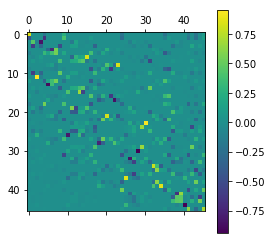

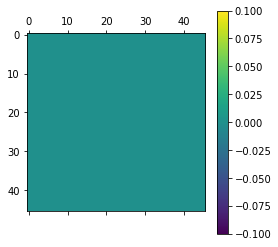

In [9]:
plt.matshow(ci_b.C.real)
plt.colorbar()
plt.matshow(ci_b.C.imag)
plt.colorbar()
plt.show()

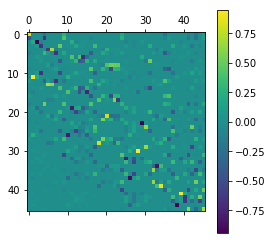

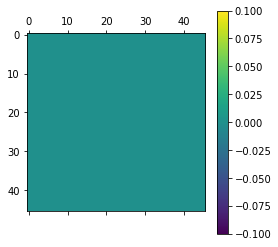

In [10]:
plt.matshow(ci.C.real)
plt.colorbar()
plt.matshow(ci.C.imag)
plt.colorbar()
plt.show()

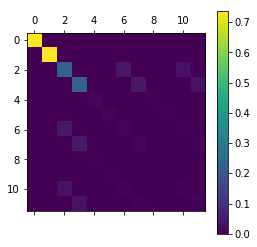

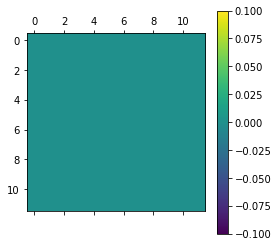

In [11]:
plt.matshow(rho_b.real)
plt.colorbar()
plt.matshow(rho_b.imag)
plt.colorbar()
plt.show()

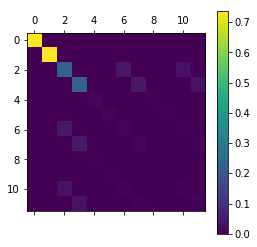

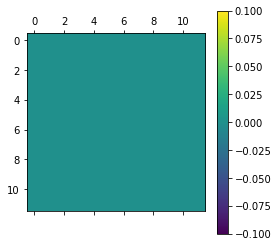

In [12]:
plt.matshow(rho.real)
plt.colorbar()
plt.matshow(rho.imag)
plt.colorbar()
plt.show()

In [13]:
np.testing.assert_allclose(rho, rho_b, atol=1e-7)